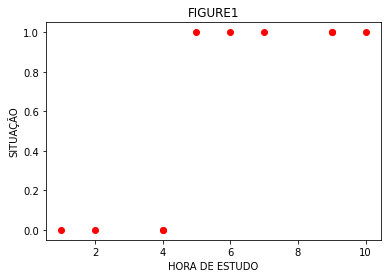

In [26]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#NOTAS
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])

#APROVADO 1 OU NÃO APROVADO
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
x = x.view(x.shape[0], 1)

plt.plot(x_numpy, y_numpy, 'ro')
plt.xlabel('HORA DE ESTUDO')
# Set the y axis label of the current axis.
plt.ylabel('SITUAÇÃO')
plt.title("FIGURE1")
plt.show()

In [31]:
# CLASS DE REGRESSÃO LOGÍSTICA

class RegressaoLogistica(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.Linear(x))
    return y_hat

<generator object Module.parameters at 0x7f75e84820b0>
Epoch:  0
Custo: 6.45080995559692382812
m: -0.78329
m (gradiente): -6.83780
b: -0.72005
b (gradiente): -0.85473
Epoch:  10
Custo: 1.90609991550445556641
m: -0.12135
m (gradiente): -5.96357
b: -0.63731
b (gradiente): -0.74545
Epoch:  20
Custo: 0.48784938454627990723
m: 0.18765
m (gradiente): -1.33209
b: -0.59869
b (gradiente): -0.16651
Epoch:  30
Custo: 0.42144691944122314453
m: 0.25665
m (gradiente): -0.38447
b: -0.59006
b (gradiente): -0.04806
Epoch:  40
Custo: 0.41470283269882202148
m: 0.27965
m (gradiente): -0.14358
b: -0.58719
b (gradiente): -0.01795
Epoch:  50
Custo: 0.41369372606277465820
m: 0.28867
m (gradiente): -0.05853
b: -0.58606
b (gradiente): -0.00732
Epoch:  60
Custo: 0.41352134943008422852
m: 0.29241
m (gradiente): -0.02469
b: -0.58559
b (gradiente): -0.00309
Epoch:  70
Custo: 0.41349032521247863770
m: 0.29401
m (gradiente): -0.01056
b: -0.58539
b (gradiente): -0.00132
Epoch:  80
Custo: 0.41348463296890258789
m: 0.29

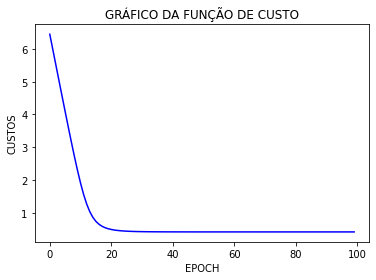

In [41]:
input_size = 1
output_size = 1
model = RegressaoLogistica(1,1)

# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print (model.parameters())

# LOOP DE TREINAMENTO
num_epochs = 100
contador_custo = []
for epoch in range(num_epochs):
  #forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  #print(y_hat)

  
  #backward pass (calcular gradientes)
  loss.backward()

  #update (atualizar os pesos)
  optimizer.step()

  if (epoch+1)%10 == 1:
      print("===============================")
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('m: {:.5f}'.format(model.Linear.weight.data.detach().item()))
      print('m (gradiente): {:.5f}'.format(model.Linear.weight.grad.detach().item()))
      print('b: {:.5f}'.format(model.Linear.bias.data.detach().item()))
      print('b (gradiente): {:.5f}'.format(model.Linear.bias.grad.detach().item()))
     
  #limpar o otimizador
  optimizer.zero_grad()



# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
plt.plot(contador_custo, 'b')
plt.xlabel('EPOCH')
# Set the y axis label of the current axis.
plt.ylabel('CUSTOS')
plt.title("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.show()


In [43]:
"""#Fazer a predição"""

# fazer predição de teste
teste = np.array([2, 3, 6, 7, 8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad():
  predicoes = model(t_teste)
  for x, y in zip(t_teste, predicoes):
    #definindo o cutoff / threshold
    status = ""
    if (y >= 0.75):
      status = "aprovado"
    else:
      status = "reprovado"
    print ('x: {:.2f} | ŷ: {:.2f} | '.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.50 |  reprovado
x: 3.00 | ŷ: 0.57 |  reprovado
x: 6.00 | ŷ: 0.77 |  aprovado
x: 7.00 | ŷ: 0.81 |  aprovado
x: 8.00 | ŷ: 0.86 |  aprovado
